In [1]:
def get_counts(df, time_step):
    filtered = df[df["time_step"] == time_step]
    counts = filtered["molecule"].value_counts().to_dict()
    for k in molecules.keys():
        if not k in counts:
            counts[k] = 0.0
    return counts

def get_counts_df(df):
    time_steps = df["time_step"].unique().tolist()
    rows = [get_counts(df, t) for t in time_steps]
    return pd.DataFrame.from_dict(rows)

def top_counts(df, time_step):
    top_df = df[df["y"] >= 15]
    top_df.reset_index(drop=True, inplace=True)
    filtered = top_df[top_df["time_step"] == time_step]
    
    top_counts = filtered["molecule"].value_counts().to_dict()
    for k in molecules.keys():
        if not k in top_counts:
            top_counts[k] = 0.0
    return top_counts

def get_top_counts(df):
    top_df = df[df["y"] >= 15]
    top_df.reset_index(drop=True, inplace=True)
    time_steps = top_df["time_step"].unique().tolist()
    rows = [get_counts(top_df, t) for t in time_steps]
    return pd.DataFrame.from_dict(rows)

def bottom_counts(df, time_step):
    bottom_df = df[df["y"] <= 5]
    bottom_df.reset_index(drop=True, inplace=True)
    filtered = bottom_df[bottom_df["time_step"] == time_step]
    bottom_counts = filtered["molecule"].value_counts().to_dict()
    for k in molecules.keys():
        if not k in bottom_counts:
            bottom_counts[k] = 0.0
    return bottom_counts

def get_bottom_counts(df):
    bottom_df = df[df["y"] <= 5]
    bottom_df.reset_index(drop=True, inplace=True)
    time_steps = bottom_df["time_step"].unique().tolist()
    rows = [get_counts(bottom_df, t) for t in time_steps]
    return pd.DataFrame.from_dict(rows)

def top_signal_transduction(df):
    top_df = df[df["y"] >= 15]
    top_df_HFRR = top_df[top_df["molecule"] == 15]
    top_result_df = top_df_HFRR.groupby('species_id')['time_step'].agg(['min', 'max'])
    top_result_df['signal transduction time'] = top_result_df['max'] - top_result_df['min']
    # return top_result_df[['species_id', 'signal transduction time']]
    return top_result_df

def bottom_signal_transduction(df):
    bottom_df = df[df["y"] <= 5]
    bottom_df_HFRR = bottom_df[bottom_df["molecule"] == 15]
    bottom_result_df = bottom_df_HFRR.groupby('species_id')['time_step'].agg(['min', 'max'])
    bottom_result_df['signal transduction time'] = bottom_result_df['max'] - bottom_result_df['min']
    return bottom_result_df


def HFRR_signal_transduction(df):
    df_HFRR = df[df["molecule"] == 15]
    result_df = df_HFRR.groupby('species_id')['time_step'].agg(['min', 'max'])
    result_df['signal transduction time'] = result_df['max'] - result_df['min']
    return result_df

def FRR_signal_transduction(df):
    df_FRR = df[df["molecule"] == 16]
    result_df = df_FRR.groupby('species_id')['time_step'].agg(['min', 'max'])
    result_df['signal transduction time'] = result_df['max'] - result_df['min']
    return result_df

def get_theta(file_name):
    theta = data_file.split('=')[1].split('.csv')[0]
    return float(theta)

molecules = {
    1: "vesicle_F",
    2: "vesicle_F_top",
    3: "vesicle_R",
    4: "vesicle_R_top",
    5: "vesicle_H",
    6: "vesicle_H_top",
    7: "fused_vesicle_F",
    8: "fused_vesicle_R",
    9: "fused_vesicle_H",
    10: "F",
    11: "H",
    12: "R",
    13: "RR",
    14: "FH",
    15: "FHRR",
    16: "FRR",
    17: "F_species",
    18: "H_species",
    19: "R_species",
    20: "F-membrane-bound"

}

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from statistics import mean
import scipy.stats as stats
import statistics
import re
from nlcor import nlcor
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy import asarray as ar,exp
from scipy.stats import pearsonr
from matplotlib.ticker import ScalarFormatter
import plotly.express as px
from matplotlib.ticker import FuncFormatter

In [5]:
DATA_PATH = 'output_basemodel'
SAVE_PATH = 'output_basemodel/figures'

In [6]:
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

In [7]:
basemodel_data = []
for subdir, dirs, files in os.walk('output_basemodel/plots_data'):
    for file in files:
        print(file)
        basemodel_data.append(file)
                

20240323_script_iteration=17.csv
20240223_script_iteration=5.csv
20240223_script_iteration=4.csv
20240323_script_iteration=16.csv
20240323_script_iteration=14.csv
20240223_script_iteration=6.csv
20240223_script_iteration=7.csv
20240323_script_iteration=15.csv
20240323_script_iteration=11.csv
20240223_script_iteration=3.csv
20240223_script_iteration=2.csv
20240323_script_iteration=10.csv
20240323_script_iteration=12.csv
20240223_script_iteration=1.csv
20240323_script_iteration=13.csv
20240223_script_iteration=10..csv
20240323_script_iteration=2.csv
20240323_script_iteration=3.csv
20240323_script_iteration=4.csv
20240323_script_iteration=5.csv
20240323_script_iteration=7.csv
20240323_script_iteration=6.csv
20240323_script_iteration=9.csv
20240323_script_iteration=20.csv
20240323_script_iteration=18.csv
20240223_script_iteration=9.csv
20240223_script_iteration=8.csv


In [8]:
basemodel_data.sort()

In [9]:
basemodel_data

['20240223_script_iteration=1.csv',
 '20240223_script_iteration=10..csv',
 '20240223_script_iteration=2.csv',
 '20240223_script_iteration=3.csv',
 '20240223_script_iteration=4.csv',
 '20240223_script_iteration=5.csv',
 '20240223_script_iteration=6.csv',
 '20240223_script_iteration=7.csv',
 '20240223_script_iteration=8.csv',
 '20240223_script_iteration=9.csv',
 '20240323_script_iteration=10.csv',
 '20240323_script_iteration=11.csv',
 '20240323_script_iteration=12.csv',
 '20240323_script_iteration=13.csv',
 '20240323_script_iteration=14.csv',
 '20240323_script_iteration=15.csv',
 '20240323_script_iteration=16.csv',
 '20240323_script_iteration=17.csv',
 '20240323_script_iteration=18.csv',
 '20240323_script_iteration=2.csv',
 '20240323_script_iteration=20.csv',
 '20240323_script_iteration=3.csv',
 '20240323_script_iteration=4.csv',
 '20240323_script_iteration=5.csv',
 '20240323_script_iteration=6.csv',
 '20240323_script_iteration=7.csv',
 '20240323_script_iteration=9.csv']

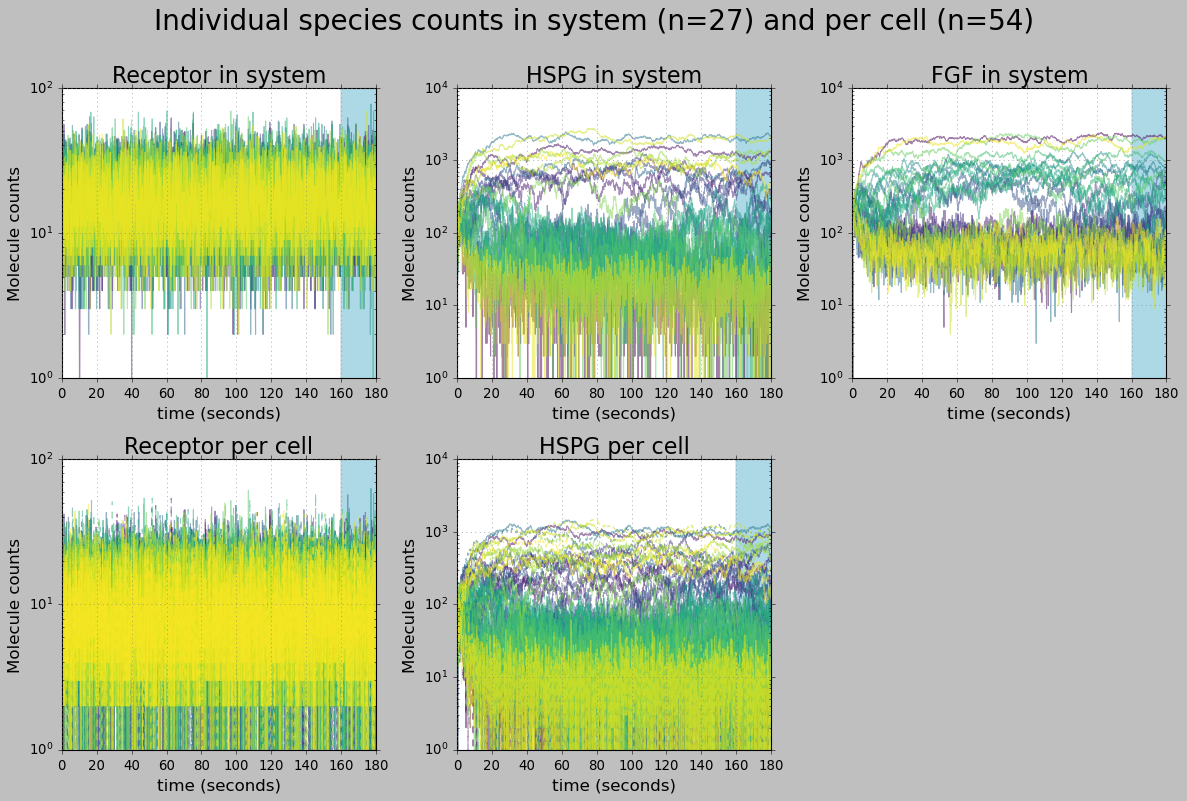

In [12]:
###### SPECIES COUNTS

fig, axes = plt.subplots(2,3, figsize=(15,10))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


plt.style.use('classic')
fig.delaxes(axes[1,2])

cmap = plt.colormaps['viridis']
HFRRs = cmap(np.linspace(0,1,27))

my_alpha = 0.5

title_size = 20
tick_size = 12
label_size = 15
line_w = 1

for i, filename in enumerate(basemodel_data):
    data = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    #### RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[0,0].set_title('Receptor in system', fontsize=title_size)
    axes[1,0].plot(data['timestep'], data['12.1'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['12.2'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,0].set_title('Receptor per cell', fontsize=title_size)

    #### FGF SPECIES
    axes[0,2].plot(data['timestep'], data['10'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[0,2].set_title('FGF in system', fontsize=title_size)

    #### HSPG SPECIES
    axes[0,1].plot(data['timestep'], data['11'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[0,1].set_title('HSPG in system', fontsize=title_size)
    axes[1,1].plot(data['timestep'], data['11.1'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['11.2'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,1].set_title('HSPG per cell', fontsize=title_size)

    for i,ax in enumerate(axes.flatten()):
        ax.set(yscale='log', xlim=(0,180),)
        ax.grid(color='grey')
        ax.axvspan(160, 180, color='lightblue', alpha=0.1)
        ax.tick_params(labelsize=tick_size, direction='out')
        ax.set_xlabel(xlabel='time (seconds)', fontsize=label_size)
        ax.set_ylabel(ylabel='Molecule counts', fontsize=label_size)

plt.tick_params(axis='both', which='major', labelsize=tick_size, direction='out')
#plt.legend(loc=(0.05, 0.05),fontsize=16)
fig.suptitle('Individual species counts in system (n=27) and per cell (n=54)', fontsize=25, y=1)
fig.tight_layout()
plt.savefig('output_basemodel/figures/single_species_counts.png')

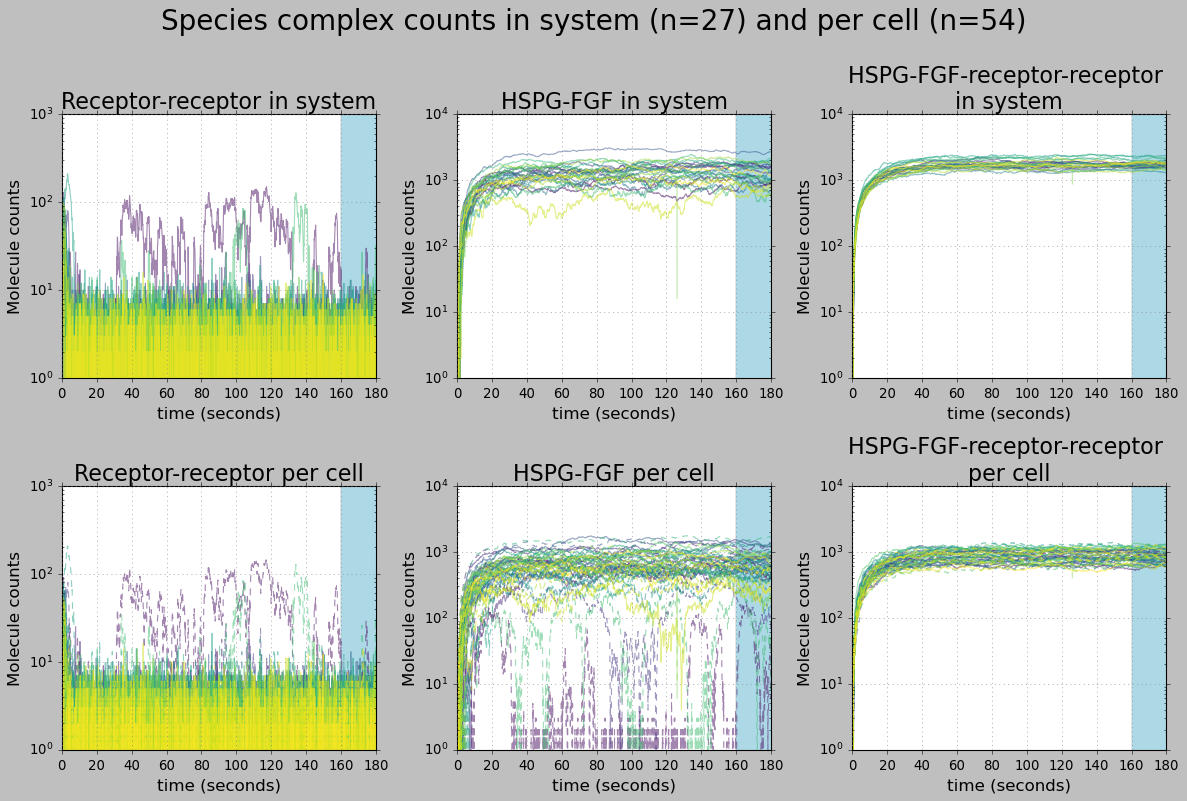

In [9]:
###### SPECIES COMPLEXES

fig, axes = plt.subplots(2,3, figsize=(15,10))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


plt.style.use('classic')

cmap = plt.colormaps['viridis']
HFRRs = cmap(np.linspace(0,1,27))

my_alpha = 0.5

title_size = 20
tick_size = 12
label_size = 15
line_w = 1

for i, filename in enumerate(basemodel_data):
    data = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['13'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[0,0].set_title('Receptor-receptor in system', fontsize=title_size)
    axes[1,0].plot(data['timestep'], data['13.1'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['13.2'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,0].set_title('Receptor-receptor per cell', fontsize=title_size)



    #### HSPG-FGF SPECIES
    axes[0,1].plot(data['timestep'], data['14'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[0,1].set_title('HSPG-FGF in system', fontsize=title_size)
    axes[1,1].plot(data['timestep'], data['14.1'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['14.2'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,1].set_title('HSPG-FGF per cell', fontsize=title_size)


    #### HHFRR SPECIES
    axes[0,2].plot(data['timestep'], data['15'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[0,2].set_title('HSPG-FGF-receptor-receptor \nin system', fontsize=title_size)
    axes[1,2].plot(data['timestep'], data['15.1'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,2].plot(data['timestep'], data['15.2'], color=HFRRs[i], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,2].set_title('HSPG-FGF-receptor-receptor \nper cell', fontsize=title_size)

    for i,ax in enumerate(axes.flatten()):
        ax.set(yscale='log', xlim=(0,180),)
        ax.grid(color='grey')
        ax.axvspan(160, 180, color='lightblue', alpha=0.1)
        ax.tick_params(labelsize=tick_size, direction='out')
        ax.set_xlabel(xlabel='time (seconds)', fontsize=label_size)
        ax.set_ylabel(ylabel='Molecule counts', fontsize=label_size)

plt.tick_params(axis='both', which='major', labelsize=tick_size, direction='out')
#plt.legend(loc=(0.05, 0.05),fontsize=16)
fig.suptitle('Species complex counts in system (n=27) and per cell (n=54)', fontsize=25, y=1)
fig.tight_layout()
plt.savefig('output_basemodel/figures/species_complexes_counts.png')

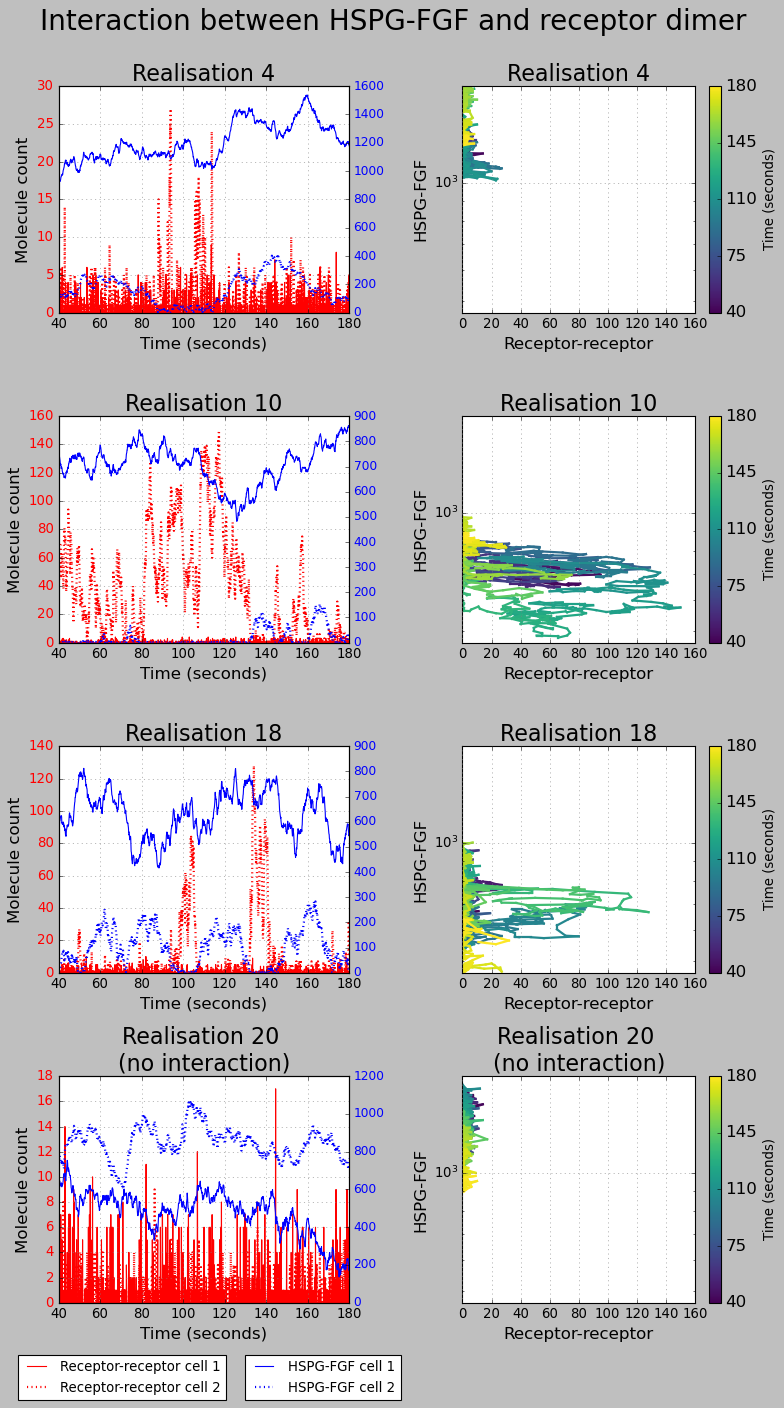

In [9]:
fig, axes = plt.subplots(4,2, figsize=(10,18))
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)

data1 = pd.read_csv(f'output_basemodel/plots_data/20240323_script_iteration=18.csv')
data1 = data1[data1['timestep'] > 40]
miny = min(data1['14'])

data2 = pd.read_csv(f'output_basemodel/plots_data/20240223_script_iteration=4.csv')
data2 = data2[data2['timestep'] > 40]
maxy = max(data2['14'])

files = ['20240223_script_iteration=4.csv', '20240223_script_iteration=10..csv',  '20240323_script_iteration=18.csv', '20240323_script_iteration=20.csv']


for j, filename in enumerate(files):
    data = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    data = data[data['timestep'] > 40]
    data = data.reset_index()
    short_data = data[data.index % 1 == 0]
    x = short_data['13']
    y = short_data['14']
    t = short_data['timestep']

    cmap = plt.get_cmap('viridis')
    normalized_t = (t-40) / 140
    normalized_t = normalized_t.reset_index(drop=True)

    for i in range(len(x) - 1):
        axes[j,1].plot(x[i:i+2], y[i:i+2], color=cmap(normalized_t[i]), lw=2)

    def format_func(value, tick_number):
        return str(int(value * (180-40) + 40))
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Time (seconds)', ax=axes[j, 1])
    cbar.set_ticks([0,0.25, 0.5, 0.75, 1],)
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(format_func))
    cbar.ax.tick_params(labelsize=15)
    cmap2 = plt.colormaps['viridis']
    HFRRs = cmap2(np.linspace(0,1, 4))
    axes[j, 0].plot(data['timestep'], data['13.1'], label = 'Receptor-receptor cell 1', color='red', lw=1)
    axes[j, 0].plot(data['timestep'], data['13.2'],color='red',  label = 'Receptor-receptor cell 2', lw=2, linestyle=":")
    axes[j,0].tick_params(axis='y', labelcolor='red')
    axesa = axes[j,0].twinx()
    axesa.plot(data['timestep'], data['14.1'], label='HSPG-FGF cell 1', color='blue', lw=1)
    axesa.plot(data['timestep'], data['14.2'], label='HSPG-FGF cell 2',color='blue', lw=2, linestyle=":")
    axesa.tick_params(axis='y', labelcolor='blue')
    # axes[j, 0].set_yscale('symlog')
    axes[j, 0].set_xlim(40,180)
    

    axes[j, 1].set_xlabel('Receptor-receptor', fontsize=15)
    axes[j, 1].set_ylabel('HSPG-FGF', fontsize=15)
    axes[j, 0].set_xlabel('Time (seconds)', fontsize=15)
    axes[j, 0].set_ylabel('Molecule count', fontsize=15)

    axes[j, 0].grid(color='grey')
    axes[j,1].grid(color='grey')
    axes[j,1].set(yscale='log')
    axes[j,1].set_xlim(0,160)
    axes[j,1].set_ylim(miny, maxy)


title_size=20

axes[3, 0].legend(bbox_to_anchor = (0.6, -0.2), fontsize=12)
axesa.legend(bbox_to_anchor = (1.2, -0.2), fontsize=12)
axes[0,0].set_title('\nRealisation 4', fontsize=title_size)
axes[0,1].set_title('\nRealisation 4', fontsize=title_size)
axes[1,0].set_title('\nRealisation 10', fontsize=title_size)
axes[1,1].set_title('\nRealisation 10', fontsize=title_size)
axes[2,0].set_title('\nRealisation 18', fontsize=title_size)
axes[2,1].set_title('\nRealisation 18', fontsize=title_size)
axes[3,0].set_title('Realisation 20 \n(no interaction)', fontsize=title_size)
axes[3,1].set_title('Realisation 20 \n(no interaction)', fontsize=title_size)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height*0.7])
plt.suptitle('Interaction between HSPG-FGF and receptor dimer', fontsize=25)
plt.tight_layout()
plt.savefig('output_basemodel/figures/HSPGFGF-receptor-dimer_interaction_test3.png')
plt.show()

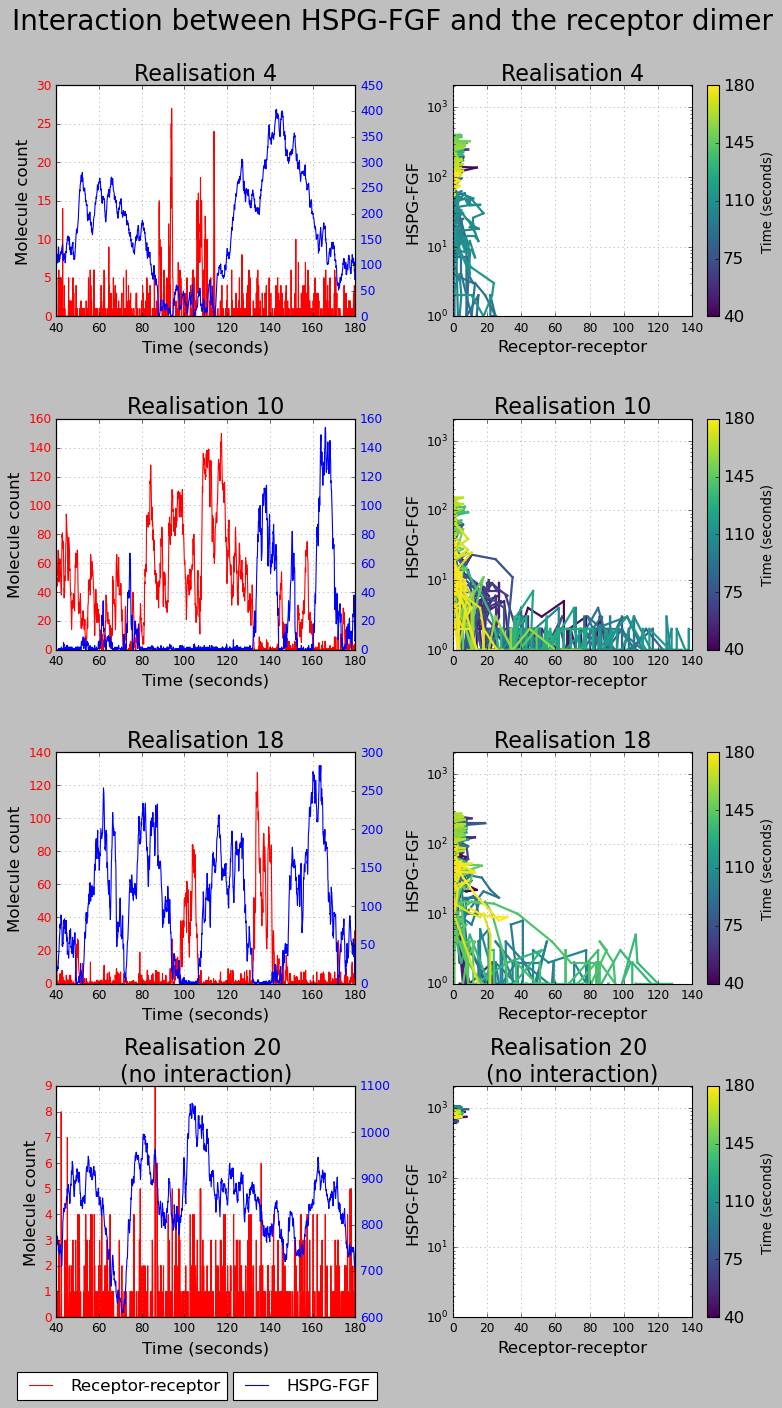

In [31]:
fig, axes = plt.subplots(4,2, figsize=(10,18))
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)

data1 = pd.read_csv(f'output_basemodel/plots_data/20240323_script_iteration=18.csv')
data1 = data1[data1['timestep'] > 40]
miny = min(data1['14.2'])

data2 = pd.read_csv(f'output_basemodel/plots_data/20240323_script_iteration=20.csv')
data2 = data2[data2['timestep'] > 40]
maxy = max(data2['14.2']) + 1000

files = ['20240223_script_iteration=4.csv', '20240223_script_iteration=10..csv',  '20240323_script_iteration=18.csv', '20240323_script_iteration=20.csv']


for j, filename in enumerate(files):
    data = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    data = data[data['timestep'] > 40]
    data = data.reset_index()
    short_data = data[data.index % 1 == 0]
    x = short_data['13.2']
    y = short_data['14.2']
    t = short_data['timestep']

    cmap = plt.get_cmap('viridis')
    normalized_t = (t-40) / 140
    normalized_t = normalized_t.reset_index(drop=True)

    for i in range(len(x) - 1):
        axes[j,1].plot(x[i:i+2], y[i:i+2], color=cmap(normalized_t[i]), lw=2)

    def format_func(value, tick_number):
        return str(int(value * (180-40) + 40))
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Time (seconds)', ax=axes[j, 1])
    cbar.set_ticks([0,0.25, 0.5, 0.75, 1],)
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(format_func))
    cbar.ax.tick_params(labelsize=15)
    cmap2 = plt.colormaps['viridis']
    HFRRs = cmap2(np.linspace(0,1, 4))
    #axes[j, 0].plot(data['timestep'], data['13.1'], label = 'Receptor-receptor cell 1', color='red', lw=1)
    axes[j, 0].plot(data['timestep'], data['13.2'],color='red',  label = 'Receptor-receptor', lw=1, linestyle="-")
    axes[j,0].tick_params(axis='y', labelcolor='red')
    axesa = axes[j,0].twinx()
    #axesa.plot(data['timestep'], data['14.1'], label='HSPG-FGF cell 1', color='blue', lw=1)
    axesa.plot(data['timestep'], data['14.2'], label='HSPG-FGF',color='blue', lw=1, linestyle="-")
    axesa.tick_params(axis='y', labelcolor='blue')
    # axes[j, 0].set_yscale('symlog')
    axes[j, 0].set_xlim(40,180)


    axes[j, 1].set_xlabel('Receptor-receptor', fontsize=15)
    axes[j, 1].set_ylabel('HSPG-FGF', fontsize=15)
    axes[j, 0].set_xlabel('Time (seconds)', fontsize=15)
    axes[j, 0].set_ylabel('Molecule count', fontsize=15)

    axes[j, 0].grid(color='grey')
    axes[j,1].grid(color='grey')
    axes[j,1].set(yscale='log')
    axes[j,1].set_xlim(0,140)
    axes[j,1].set_ylim(1, maxy)


title_size=20

axes[3, 0].legend(bbox_to_anchor = (0.6, -0.2), fontsize=15)
axesa.legend(bbox_to_anchor = (1.1, -0.2), fontsize=15)
axes[0,0].set_title('\nRealisation 4', fontsize=title_size)
axes[0,1].set_title('\nRealisation 4', fontsize=title_size)
axes[1,0].set_title('\nRealisation 10', fontsize=title_size)
axes[1,1].set_title('\nRealisation 10', fontsize=title_size)
axes[2,0].set_title('\nRealisation 18', fontsize=title_size)
axes[2,1].set_title('\nRealisation 18', fontsize=title_size)
axes[3,0].set_title('Realisation 20 \n(no interaction)', fontsize=title_size)
axes[3,1].set_title('Realisation 20 \n(no interaction)', fontsize=title_size)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height*0.7])
plt.suptitle('Interaction between HSPG-FGF and the receptor dimer', fontsize=25)
plt.tight_layout()
plt.savefig('output_basemodel/figures/single_cell_interaction.png')

In [11]:

miny = min(data1['14'])

In [12]:
data1 = pd.read_csv(f'output_basemodel/plots_data/20240323_script_iteration=18.csv')
data1 = data1[data1['timestep'] > 40]
miny = min(data1['14'])
print(miny)

468.0


In [13]:
basemodel_steadystate = []
for i in basemodel_data:
    data = pd.read_csv(f'output_basemodel/plots_data/{i}')
    data = data[data['timestep'] > 40]
    basemodel_steadystate.append(data)
    print(f'info processing {i}')

basemodel_steadystate = pd.concat(basemodel_steadystate)
basemodel_steadystate.drop(columns=['Unnamed: 0'])
basemodel_finalstate = basemodel_steadystate[basemodel_steadystate['timestep'] >= 160]

info processing 20240223_script_iteration=1.csv
info processing 20240223_script_iteration=10..csv
info processing 20240223_script_iteration=2.csv
info processing 20240223_script_iteration=3.csv
info processing 20240223_script_iteration=4.csv
info processing 20240223_script_iteration=5.csv
info processing 20240223_script_iteration=6.csv
info processing 20240223_script_iteration=7.csv
info processing 20240223_script_iteration=8.csv
info processing 20240223_script_iteration=9.csv
info processing 20240323_script_iteration=10.csv
info processing 20240323_script_iteration=11.csv
info processing 20240323_script_iteration=12.csv
info processing 20240323_script_iteration=13.csv
info processing 20240323_script_iteration=14.csv
info processing 20240323_script_iteration=15.csv
info processing 20240323_script_iteration=16.csv
info processing 20240323_script_iteration=17.csv
info processing 20240323_script_iteration=18.csv
info processing 20240323_script_iteration=2.csv
info processing 20240323_scri

In [14]:
final_mean = pd.DataFrame()
for i in basemodel_data:
    data = pd.read_csv(f'output_basemodel/plots_data/{i}')
    data = data[data['timestep'] > 160]
    data = data.mean()
    final_mean[i] = data
    print(f'info processing {i}')

final_mean = final_mean.T

info processing 20240223_script_iteration=1.csv
info processing 20240223_script_iteration=10..csv
info processing 20240223_script_iteration=2.csv
info processing 20240223_script_iteration=3.csv
info processing 20240223_script_iteration=4.csv
info processing 20240223_script_iteration=5.csv
info processing 20240223_script_iteration=6.csv
info processing 20240223_script_iteration=7.csv
info processing 20240223_script_iteration=8.csv
info processing 20240223_script_iteration=9.csv
info processing 20240323_script_iteration=10.csv
info processing 20240323_script_iteration=11.csv
info processing 20240323_script_iteration=12.csv
info processing 20240323_script_iteration=13.csv
info processing 20240323_script_iteration=14.csv
info processing 20240323_script_iteration=15.csv
info processing 20240323_script_iteration=16.csv
info processing 20240323_script_iteration=17.csv
info processing 20240323_script_iteration=18.csv
info processing 20240323_script_iteration=2.csv
info processing 20240323_scri

Want to try and plot cell 1 vs cell 2 for all plots and show they are the same. 

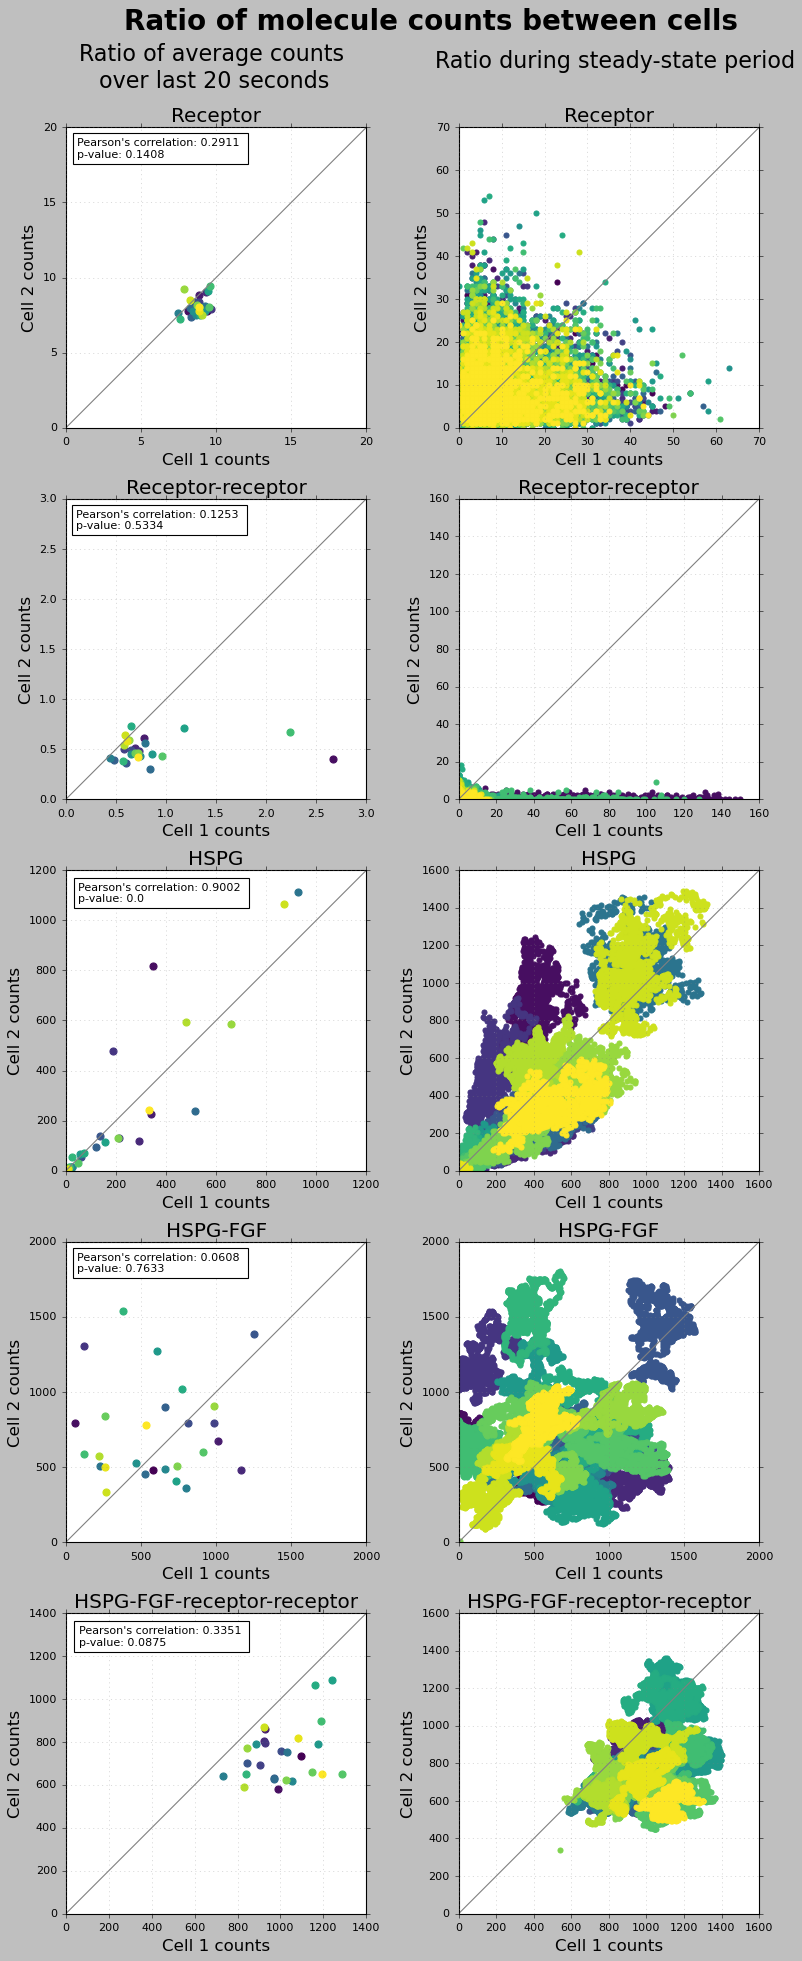

In [15]:
n_rows = 5
n_columns = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(10, 25))
plt.style.use('classic')
plt.tick_params(axis='both', which='major', labelsize=15)

cmap = plt.colormaps['viridis']
HFRRs = cmap(np.linspace(0,1,27))

cell1_HFRR = []
cell2_HFRR = []
cell1_R = []
cell2_R = []
cell1_RR = []
cell2_RR = []
cell1_H = []
cell2_H = []
cell1_HF = []
cell2_HF = []

R_corr1 = []
RR_corr1 = []
H_corr1 = []
HF_corr1 = []
HFRR_corr1 = []
R_corr2 = []
RR_corr2 = []
H_corr2 = []
HF_corr2 = []
HFRR_corr2 = []

my_mean = pd.DataFrame()
for i, filename in enumerate(basemodel_data):
    readdata = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    data = readdata[readdata['timestep'] > 30]
    mydata = readdata[readdata['timestep'] > 160]
    my_mean[i] = mydata.mean()
    if data['15.1'].tail(200).mean() > data['15.2'].tail(200).mean():
        cell1_15 = data['15.1'].values
        cell2_15 = data['15.2'].values
        cell1_12 = data['12.1'].values
        cell2_12 = data['12.2'].values
        cell1_13 = data['13.1'].values
        cell2_13 = data['13.2'].values
        cell1_11 = data['11.1'].values
        cell2_11 = data['11.2'].values
        cell1_14 = data['14.1'].values
        cell2_14 = data['14.2'].values

    else:
        cell1_15 = data['15.2'].values
        cell2_15 = data['15.1'].values
        cell1_12 = data['12.2'].values
        cell2_12 = data['12.1'].values
        cell1_13 = data['13.2'].values
        cell2_13 = data['13.1'].values
        cell1_11 = data['11.2'].values
        cell2_11 = data['11.1'].values
        cell1_14 = data['14.2'].values
        cell2_14 = data['14.1'].values
    
    cell1_HFRR = cell1_15[-202:].mean()
    cell2_HFRR = cell2_15[-202:].mean()
    cell1_R = cell1_12[-202:].mean()
    cell2_R = cell2_12[-202:].mean()
    cell1_RR = cell1_13[-202:].mean()
    cell2_RR = cell2_13[-202:].mean()
    cell1_H = cell1_11[-202:].mean()
    cell2_H = cell2_11[-202:].mean()
    cell1_HF = cell1_14[-202:].mean()
    cell2_HF = cell2_14[-202:].mean()

    
    data_lists_0 = [ (cell1_R, cell2_R), (cell1_RR, cell2_RR), (cell1_H, cell2_H), (cell1_HF, cell2_HF), (cell1_HFRR, cell2_HFRR) ]
    data_lists_1 = [ (cell1_12, cell2_12), (cell1_13, cell2_13), (cell1_11, cell2_11), (cell1_14, cell2_14), (cell1_15, cell2_15)]
    titles = ['Receptor', 'Receptor-receptor', 'HSPG', 'HSPG-FGF', 'HSPG-FGF-receptor-receptor']
    R_corr1.append(cell1_R)
    R_corr2.append(cell2_R)
    RR_corr1.append(cell1_RR)
    RR_corr2.append(cell2_RR)
    H_corr1.append(cell1_H)
    H_corr2.append(cell2_H)
    HF_corr1.append(cell1_HF)
    HF_corr2.append(cell2_HF)
    HFRR_corr1.append(cell1_HFRR)
    HFRR_corr2.append(cell2_HFRR)
    for ax, (data_x, data_y), title in zip(axes[:, 0], data_lists_0, titles):
        ax.scatter(data_x, data_y, color=HFRRs[i], s=40)
        ax.set_title(title, fontsize=20)
        


    for ax, (data_x, data_y), title in zip(axes[:,1], data_lists_1, titles):
        ax.scatter(data_x, data_y, color=HFRRs[i])
        ax.set_title(title, fontsize=20)

    my_limits_0 = [(0,20), (0,3), (0,1200), (0,2000), (0,1400)]
    my_limits_1 = [(0,70), (0,160), (0,1600), (0,2000), (0,1600)]
    titles = ['Receptor', 'Receptor-receptor', 'HSPG', 'HSPG-FGF', 'HSPG-FGF-receptor-receptor']
    for j in range(5):
        axes[j, 0].set_xlim(my_limits_0[j])
        axes[j, 0].set_ylim(my_limits_0[j])
        axes[j, 1].set_xlim(my_limits_1[j])
        axes[j, 1].set_ylim(my_limits_1[j])
        axes[j, 0].set_title(titles[j], fontsize=18)
        axes[j, 1].set_title(titles[j], fontsize=18)

for i,ax in enumerate(axes.flatten()):
    ax.grid(color='grey', alpha=0.5)
    ax.tick_params(labelsize=10, direction='out')
    ax.set_xlabel(xlabel='Cell 1 counts', fontsize=15)
    ax.set_ylabel(ylabel='Cell 2 counts', fontsize=15)
    ax.axline((0,0), slope=1, color='grey')
    ax.set_aspect('equal', adjustable='box')



fig.suptitle('Ratio of molecule counts between cells', fontsize=25, horizontalalignment='center', fontweight='bold', x=0.55)
fig.text(0.28, 0.94, 'Ratio of average counts \nover last 20 seconds', fontsize=20, horizontalalignment='center')
fig.text(0.78, 0.95, 'Ratio during steady-state period', fontsize=20,  horizontalalignment='center')

x = pearsonr(R_corr1, R_corr2)
p_stat = x[0]
p_val = x[1]
axes[0,0].text(x=0.75, y=18, s=f"Pearson's correlation: {round(p_stat, 4)} \np-value: {round(p_val, 4)}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=10)

x = pearsonr(RR_corr1, RR_corr2)
p_stat = x[0]
p_val = x[1]
axes[1,0].text(x=0.1, y=2.7, s=f"Pearson's correlation: {round(p_stat, 4)} \np-value: {round(p_val, 4)}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=10)

x = pearsonr(H_corr1, H_corr2)
p_stat = x[0]
p_val = x[1]
axes[2,0].text(x=50, y=1075, s=f"Pearson's correlation: {round(p_stat, 4)} \np-value: {round(p_val, 4)}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=10)

x = pearsonr(HF_corr1, HF_corr2)
p_stat = x[0]
p_val = x[1]
axes[3,0].text(x=75, y=1800, s=f"Pearson's correlation: {round(p_stat, 4)} \np-value: {round(p_val, 4)}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=10)

x = pearsonr(HFRR_corr1, HFRR_corr2)
p_stat = x[0]
p_val = x[1]
axes[4,0].text(x=60, y=1250, s=f"Pearson's correlation: {round(p_stat, 4)} \np-value: {round(p_val, 4)}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
fig.savefig('output_basemodel/figures/ratio_counts_between_cells.png')

In [28]:
x = pearsonr(HFRR_corr1, HFRR_corr2)
p_stat = x[0]
p_val = x[1]

print(f"Pearson's correlation\nr(25) = {p_stat: .2e} \np = {p_val: .2e}")

Pearson's correlation
r(25) =  3.35e-01 
p =  8.75e-02


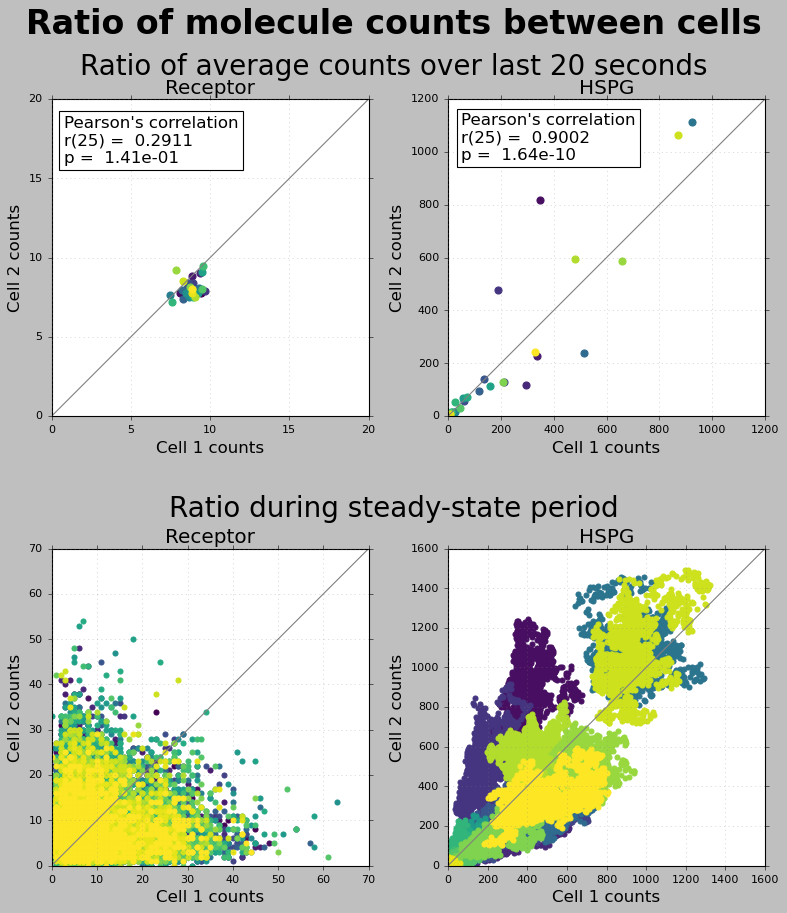

In [50]:
n_rows = 2
n_columns = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(10, 12))
plt.style.use('classic')
plt.tick_params(axis='both', which='major', labelsize=15)

cmap = plt.colormaps['viridis']
HFRRs = cmap(np.linspace(0,1,27))


cell1_R = []
cell2_R = []
cell1_H = []
cell2_H = []


R_corr1 = []
H_corr1 = []
R_corr2 = []
H_corr2 = []

my_mean = pd.DataFrame()
for i, filename in enumerate(basemodel_data):
    readdata = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    data = readdata[readdata['timestep'] > 30]
    mydata = readdata[readdata['timestep'] > 160]
    my_mean[i] = mydata.mean()
    if data['15.1'].tail(200).mean() > data['15.2'].tail(200).mean():
        cell1_12 = data['12.1'].values
        cell2_12 = data['12.2'].values
        cell1_11 = data['11.1'].values
        cell2_11 = data['11.2'].values

    else:
        cell1_12 = data['12.2'].values
        cell2_12 = data['12.1'].values
        cell1_11 = data['11.2'].values
        cell2_11 = data['11.1'].values

    cell1_R = cell1_12[-202:].mean()
    cell2_R = cell2_12[-202:].mean()
    cell1_H = cell1_11[-202:].mean()
    cell2_H = cell2_11[-202:].mean()



    data_lists_0 = [ (cell1_R, cell2_R),  (cell1_H, cell2_H), ]
    data_lists_1 = [ (cell1_12, cell2_12),  (cell1_11, cell2_11)]
    titles = ['Receptor', 'HSPG',]
    R_corr1.append(cell1_R)
    R_corr2.append(cell2_R)
    H_corr1.append(cell1_H)
    H_corr2.append(cell2_H)

    for ax, (data_x, data_y), title in zip(axes[0, :], data_lists_0, titles):
        ax.scatter(data_x, data_y, color=HFRRs[i], s=40)
        ax.set_title(title, fontsize=20)



    for ax, (data_x, data_y), title in zip(axes[1,:], data_lists_1, titles):
        ax.scatter(data_x, data_y, color=HFRRs[i])
        ax.set_title(title, fontsize=20)

    my_limits_0 = [(0,20),  (0,1200), ]
    my_limits_1 = [(0,70),  (0,1600),]
    titles = ['Receptor',  'HSPG', ]
    for j in range(2):
        axes[0, j].set_xlim(my_limits_0[j])
        axes[0, j].set_ylim(my_limits_0[j])
        axes[1, j].set_xlim(my_limits_1[j])
        axes[1, j].set_ylim(my_limits_1[j])
        axes[0, j].set_title(titles[j], fontsize=18)
        axes[1, j].set_title(titles[j], fontsize=18)

for i,ax in enumerate(axes.flatten()):
    ax.grid(color='grey', alpha=0.5)
    ax.tick_params(labelsize=10, direction='out')
    ax.set_xlabel(xlabel='Cell 1 counts', fontsize=15)
    ax.set_ylabel(ylabel='Cell 2 counts', fontsize=15)
    ax.axline((0,0), slope=1, color='grey')
    ax.set_aspect('equal', adjustable='box')



fig.suptitle('Ratio of molecule counts between cells', fontsize=30, horizontalalignment='center', fontweight='bold', x=0.5)
fig.text(0.5, 0.91, 'Ratio of average counts over last 20 seconds', fontsize=25, horizontalalignment='center')
fig.text(0.5, 0.45, 'Ratio during steady-state period', fontsize=25,  horizontalalignment='center')

x = pearsonr(R_corr1, R_corr2)
p_stat = x[0]
p_val = x[1]
axes[0,0].text(x=0.75, y=16, s=f"Pearson's correlation\nr(25) = {p_stat: .4} \np = {p_val: .2e}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)

x = pearsonr(H_corr1, H_corr2)
p_stat = x[0]
p_val = x[1]
axes[0,1].text(x=50, y=970, s=f"Pearson's correlation\nr(25) = {p_stat: .4} \np = {p_val: .2e}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)


plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('output_basemodel/figures/single_species_ratio.png')
plt.show()

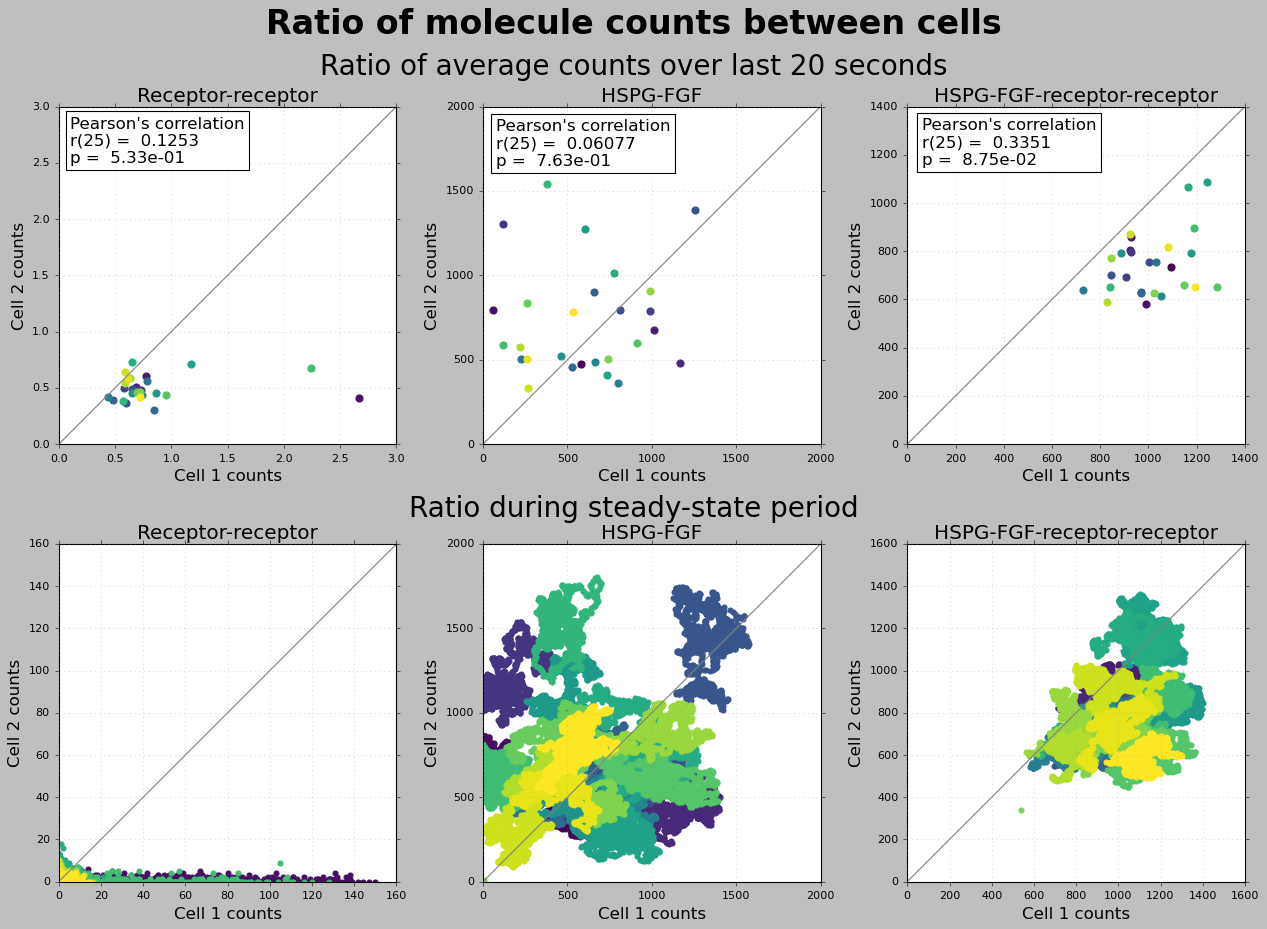

In [51]:
n_rows = 2
n_columns = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(16, 12))
plt.style.use('classic')
plt.tick_params(axis='both', which='major', labelsize=15)

cmap = plt.colormaps['viridis']
HFRRs = cmap(np.linspace(0,1,27))

cell1_HFRR = []
cell2_HFRR = []
cell1_RR = []
cell2_RR = []
cell1_HF = []
cell2_HF = []


RR_corr1 = []
HF_corr1 = []
HFRR_corr1 = []
RR_corr2 = []
HF_corr2 = []
HFRR_corr2 = []

my_mean = pd.DataFrame()
for i, filename in enumerate(basemodel_data):
    readdata = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    data = readdata[readdata['timestep'] > 30]
    mydata = readdata[readdata['timestep'] > 160]
    my_mean[i] = mydata.mean()
    if data['15.1'].tail(200).mean() > data['15.2'].tail(200).mean():
        cell1_15 = data['15.1'].values
        cell2_15 = data['15.2'].values
        cell1_13 = data['13.1'].values
        cell2_13 = data['13.2'].values
        cell1_14 = data['14.1'].values
        cell2_14 = data['14.2'].values

    else:
        cell1_15 = data['15.2'].values
        cell2_15 = data['15.1'].values
        cell1_13 = data['13.2'].values
        cell2_13 = data['13.1'].values
        cell1_14 = data['14.2'].values
        cell2_14 = data['14.1'].values

    cell1_HFRR = cell1_15[-202:].mean()
    cell2_HFRR = cell2_15[-202:].mean()
    cell1_RR = cell1_13[-202:].mean()
    cell2_RR = cell2_13[-202:].mean()
    cell1_HF = cell1_14[-202:].mean()
    cell2_HF = cell2_14[-202:].mean()


    data_lists_0 = [ (cell1_RR, cell2_RR),  (cell1_HF, cell2_HF), (cell1_HFRR, cell2_HFRR) ]
    data_lists_1 = [ (cell1_13, cell2_13), (cell1_14, cell2_14), (cell1_15, cell2_15)]
    titles = [ 'Receptor-receptor',  'HSPG-FGF', 'HSPG-FGF-receptor-receptor']
    RR_corr1.append(cell1_RR)
    RR_corr2.append(cell2_RR)
    HF_corr1.append(cell1_HF)
    HF_corr2.append(cell2_HF)
    HFRR_corr1.append(cell1_HFRR)
    HFRR_corr2.append(cell2_HFRR)
    for ax, (data_x, data_y), title in zip(axes[0, :], data_lists_0, titles):
        ax.scatter(data_x, data_y, color=HFRRs[i], s=40)
        ax.set_title(title, fontsize=20)



    for ax, (data_x, data_y), title in zip(axes[1,:], data_lists_1, titles):
        ax.scatter(data_x, data_y, color=HFRRs[i])
        ax.set_title(title, fontsize=20)

    my_limits_0 = [ (0,3),  (0,2000), (0,1400)]
    my_limits_1 = [(0,160),  (0,2000), (0,1600)]
    titles = [ 'Receptor-receptor',  'HSPG-FGF', 'HSPG-FGF-receptor-receptor']
    for j in range(3):
        axes[0,j].set_xlim(my_limits_0[j])
        axes[0,j].set_ylim(my_limits_0[j])
        axes[1,j].set_xlim(my_limits_1[j])
        axes[1,j].set_ylim(my_limits_1[j])
        axes[0,j].set_title(titles[j], fontsize=18)
        axes[1,j].set_title(titles[j], fontsize=18)

for i,ax in enumerate(axes.flatten()):
    ax.grid(color='grey', alpha=0.5)
    ax.tick_params(labelsize=10, direction='out')
    ax.set_xlabel(xlabel='Cell 1 counts', fontsize=15)
    ax.set_ylabel(ylabel='Cell 2 counts', fontsize=15)
    ax.axline((0,0), slope=1, color='grey')
    ax.set_aspect('equal', adjustable='box')



fig.suptitle('Ratio of molecule counts between cells', fontsize=30, horizontalalignment='center', fontweight='bold', x=0.5)
fig.text(0.5, 0.91, 'Ratio of average counts over last 20 seconds', fontsize=25, horizontalalignment='center')
fig.text(0.5, 0.45, 'Ratio during steady-state period', fontsize=25,  horizontalalignment='center')

x = pearsonr(RR_corr1, RR_corr2)
p_stat = x[0]
p_val = x[1]
axes[0,0].text(x=0.1, y=2.5, s=f"Pearson's correlation\nr(25) = {p_stat: .4} \np = {p_val: .2e}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)


x = pearsonr(HF_corr1, HF_corr2)
p_stat = x[0]
p_val = x[1]
axes[0,1].text(x=75, y=1650, s=f"Pearson's correlation\nr(25) = {p_stat: .4} \np = {p_val: .2e}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)

x = pearsonr(HFRR_corr1, HFRR_corr2)
p_stat = x[0]
p_val = x[1]
axes[0,2].text(x=60, y=1160, s=f"Pearson's correlation\nr(25) = {p_stat: .4} \np = {p_val: .2e}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('output_basemodel/figures/species_complexes_ratio.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

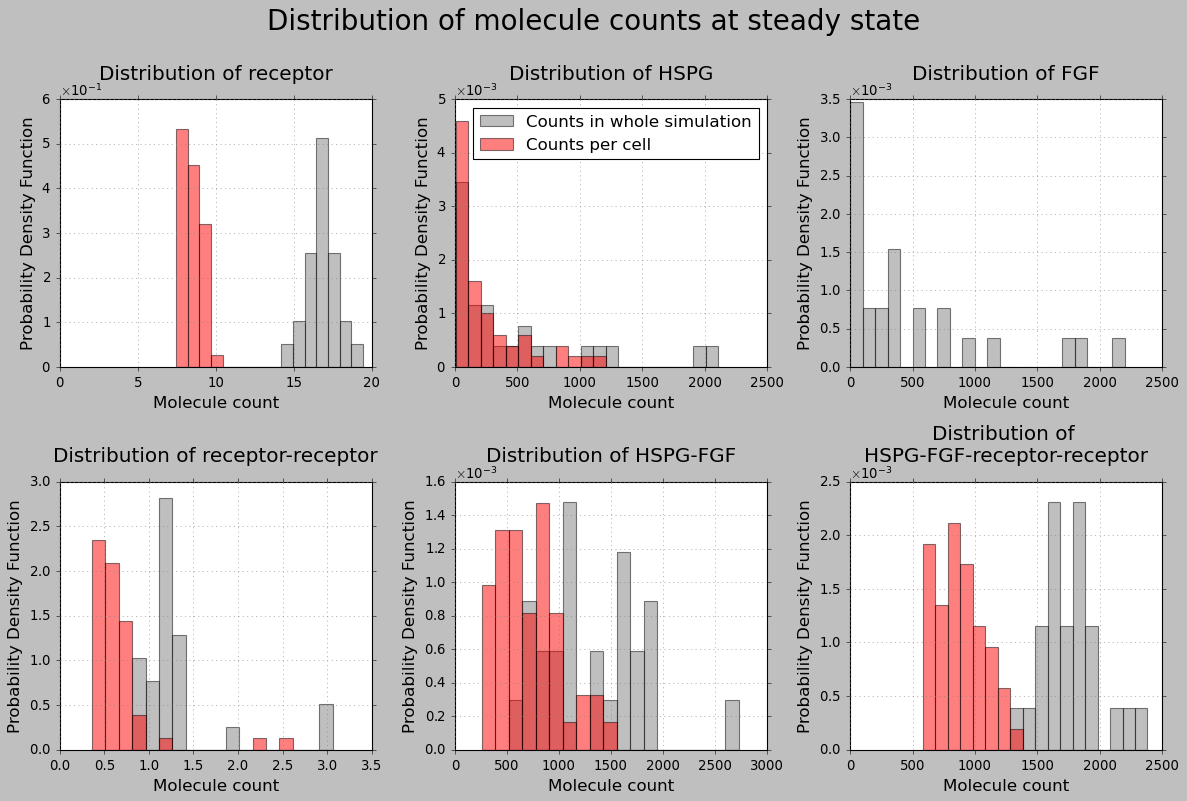

In [18]:
n_rows = 2
n_columns = 3
plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(15, 10), sharey=False)
plt.style.use('classic')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
cmap = plt.colormaps['viridis']
HFRRs = cmap(np.linspace(0,1, 10))

my_alpha = 0.5

title_size = 18
tick_size = 12
label_size = 15
my_pad = 18

#### Receptor, molecule 12, axes [0,0]
a = 0.75
n, bins, patches = axes[0,0].hist(final_mean['12'], bins=np.arange(min(final_mean['12.1']), max(final_mean['12']) + a, a), color='grey', density=True, alpha=my_alpha)
receptor_per_cell = pd.concat([final_mean['12.1'], final_mean['12.2']])
n, bins, patches = axes[0,0].hist(receptor_per_cell, bins=np.arange(min(final_mean['12.1']), max(final_mean['12']) + a, a), color='red', density=True, alpha=my_alpha)
axes[0,0].set_title('Distribution of receptor', fontsize=title_size, pad=my_pad)
axes[0,0].set_ylabel('Probability Density Function', fontsize=label_size)
axes[0,0].set_xlim(0,20)

#### Receptor-Receptor, molecule 13, axes [1,0]
b = 0.15
n, bins, patches = axes[1,0].hist(final_mean['13'], bins=np.arange(min(final_mean['13.1']), max(final_mean['13']) + b, b), color='grey', density=True, alpha=my_alpha)
receptordimer_per_cell = pd.concat([final_mean['13.1'], final_mean['13.2']])
n, bins, patches = axes[1,0].hist(receptordimer_per_cell, bins=np.arange(min(final_mean['13.1']), max(final_mean['13']) + b, b), color='red', density=True, alpha=my_alpha)
axes[1,0].set_title('Distribution of receptor-receptor', fontsize=title_size, pad=my_pad)

#### FGF, molecule 10, axes [0,2]
c = 100
n, bins, patches = axes[0,2].hist(final_mean['10'],bins=np.arange(min(final_mean['10.1']), max(final_mean['10']) + c, c), color='grey', density=True, alpha=my_alpha)
axes[0,2].set_title('Distribution of FGF', fontsize=title_size, pad=my_pad)

#### HSPG, molecule 11, axes [0,1]
d = 100
n, bins, patches = axes[0,1].hist(final_mean['11'], bins=np.arange(min(final_mean['11.1']), max(final_mean['11']) + d, d), color='grey', density=True, alpha=my_alpha, label='Counts in whole simulation')
HSPG_per_cell = pd.concat([final_mean['11.1'], final_mean['11.2']])
n, bins, patches = axes[0,1].hist(HSPG_per_cell, bins=np.arange(min(final_mean['11.1']), max(final_mean['11']) + d, d), color='red', density=True, alpha=my_alpha, label = 'Counts per cell')
axes[0,1].set_title('Distribution of HSPG', fontsize=title_size, pad=my_pad)
axes[0,1].legend(loc='upper right', fontsize=15)

#### HSPG-FGF, molecule 14, axes [1,1]
e = 130
n, bins, patches = axes[1,1].hist(final_mean['14'], bins=np.arange(min(final_mean['14.1']), max(final_mean['14']) + e, e),color='grey', density=True, alpha=my_alpha)
axes[1,1].set_title('Distribution of HSPG-FGF', fontsize=title_size, pad=my_pad)
axes[1,1].set_xlabel('Molecule count', fontsize=label_size)
HSPGFGF_per_cell = pd.concat([final_mean['14.1'], final_mean['14.2']])
n, bins, patches = axes[1,1].hist(HSPGFGF_per_cell, bins=np.arange(min(final_mean['14.1']), max(final_mean['14']) + e, e),color='red', density=True, alpha=my_alpha)
axes[1,1].set_ylabel('Probability Density Function', fontsize=label_size)
axes[1,1].set_xlabel('Molecule count', fontsize=label_size)


#### HFRR, molecule 15, axes [1,2]
f = 100
n, bins, patches = axes[1,2].hist(final_mean['15'], bins=np.arange(min(final_mean['15.1']), max(final_mean['15']) + f, f), color='grey', density=True, alpha=my_alpha)
HFRR_per_cell = pd.concat([final_mean['15.1'],final_mean['15.2']])
n, bins, patches = axes[1,2].hist(HFRR_per_cell, bins=np.arange(min(final_mean['15.1']), max(final_mean['15']) + f, f), color='red', density=True, alpha=my_alpha)
axes[1,2].set_title('Distribution of \nHSPG-FGF-receptor-receptor', fontsize=title_size, pad=my_pad)
axes[1,2].set_xlabel('Molecule count', fontsize=label_size)
axes[1,2].set_xlim(0,2500)



for i,ax in enumerate(axes.flatten()):
    ax.grid(color='grey')
    ax.tick_params(labelsize=tick_size, direction='out')
    ax.set_ylabel(ylabel='Probability Density Function', fontsize=label_size)
    ax.set_xlabel(xlabel='Molecule count', fontsize=label_size)
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,1))

fig.suptitle('Distribution of molecule counts at steady state', fontsize=25, y=1.0)
fig.tight_layout()
plt.savefig('output_basemodel/figures/double_histograms.png')